In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go


In [16]:
combined = Path("Resources/combined_cleaned_data.csv")

combined_df =pd.read_csv(combined)

In [17]:
combined_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,streaming_service
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Netflix
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Netflix
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Netflix


In [18]:
tv_shows_df = combined_df[(combined_df["type"] == "TV Show")]

tv_shows_df['Season Number'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)

tv_shows_df.head()

/var/folders/16/hndb9ls55qvcxfq6btwxrkbc0000gn/T/ipykernel_85119/3458973940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['Season Number'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,streaming_service,Season Number
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Netflix,2
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix,1
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix,1
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Netflix,2
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Netflix,1


In [19]:
Netflix_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Netflix")]
Netflix_tv_duration = Netflix_tv_df["Season Number"].value_counts()
Netflix_tv_duration

Season Number
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
13       3
12       2
15       2
11       2
17       1
Name: count, dtype: int64

In [20]:
Disney_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Disney")]
Disney_tv_duration = Disney_tv_df["Season Number"].value_counts()
Disney_tv_duration

Season Number
1     219
2      82
3      45
4      24
5      11
7       5
6       3
10      2
9       2
8       2
19      1
32      1
16      1
Name: count, dtype: int64

In [21]:
Hulu_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Hulu")]
Hulu_tv_duration = Hulu_tv_df["Season Number"].value_counts()
Hulu_tv_duration

Season Number
1     829
2     265
3     121
4      99
5      80
6      56
7      46
8      20
9      17
11     13
10     10
12      8
13      3
16      3
14      3
15      2
23      2
29      2
22      2
17      2
20      1
19      1
30      1
25      1
34      1
26      1
Name: count, dtype: int64

In [22]:
Amazon_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Amazon")]
Amazon_tv_duration = Amazon_tv_df["Season Number"].value_counts()
Amazon_tv_duration

Season Number
1     1342
2      229
3      110
4       62
5       39
6       23
7       15
8       10
9        6
10       5
14       3
11       3
12       3
29       1
21       1
19       1
15       1
Name: count, dtype: int64

In [23]:
TV_duration_df = pd.DataFrame({
    "Netflix TV Duration": Netflix_tv_duration,
    "Hulu TV Duration": Hulu_tv_duration,
    "Amazon TV Duration": Amazon_tv_duration,
    "Disney TV Duration": Disney_tv_duration
})

TV_duration_df_sorted = TV_duration_df.sort_values(by="Season Number", ascending=True)
TV_duration_df_sorted

,Netflix TV Duration,Hulu TV Duration,Amazon TV Duration,Disney TV Duration
Season Number,,,,
1,1793.0,829.0,1342.0,219.0
2,425.0,265.0,229.0,82.0
3,199.0,121.0,110.0,45.0
4,95.0,99.0,62.0,24.0
5,65.0,80.0,39.0,11.0
6,33.0,56.0,23.0,3.0
7,23.0,46.0,15.0,5.0
8,17.0,20.0,10.0,2.0
9,9.0,17.0,6.0,2.0


<Axes: xlabel='Season Number'>

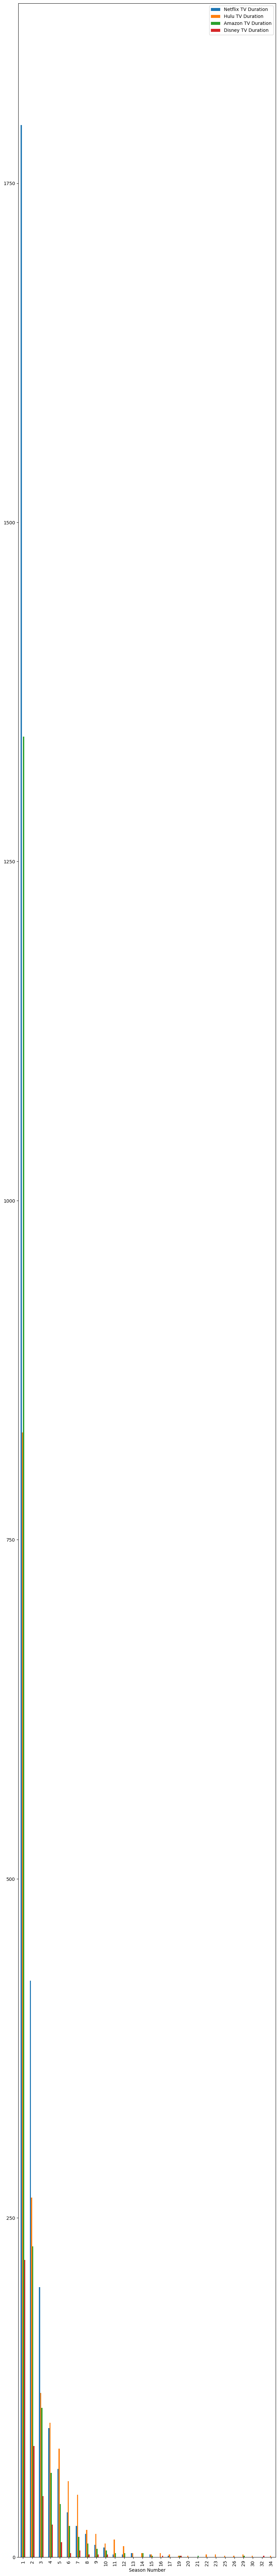

In [24]:
TV_duration_df_Bar = pd.DataFrame({
    "Netflix TV Duration": Netflix_tv_duration,
    "Hulu TV Duration": Hulu_tv_duration,
    "Amazon TV Duration": Amazon_tv_duration,
    "Disney TV Duration": Disney_tv_duration
})

TV_duration_df_Bar.plot(figsize=(10,100), kind="bar")

In [27]:
import plotly.graph_objects as go


#  top 10 disney
fig = go.Figure()

fig.add_trace(go.Bar(
    x=Disney_tv_duration.index,
    y=Disney_tv_duration.values,
    name='Disney'
))

# top 10 hulu
fig.add_trace(go.Bar(
    x=Hulu_tv_duration.index,
    y=Hulu_tv_duration.values,
    name='Hulu',
    visible=False  
))
# top 10 amazon
fig.add_trace(go.Bar(
    x=Amazon_tv_duration.index,
    y=Amazon_tv_duration.values,
    name='Amazon',
    visible=False  
))

#top 10 netflix 
fig.add_trace(go.Bar(
    x=Netflix_tv_duration.index,
    y=Netflix_tv_duration.values,
    name='Netflix',
    visible=False  
))

# top 10 for all streaming services

fig.add_trace(go.Bar(
    x=TV_duration_df_sorted.index,
    y=TV_duration_df_sorted.values,
    name='Duration',
    visible=False  
))

# dropdown menu
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Disney",
                    "method": "update",
                    "args": [{"visible": [True, False, False, False, False]}, {"title": "TV Show Duration in Disney"}],
                },
                {
                    "label": "Hulu",
                    "method": "update",
                    "args": [{"visible": [False, True, False, False, False]}, {"title": "TV Show Duration in Hulu"}],
                },
                {
                    "label": "Amazon",
                    "method": "update",
                    "args": [{"visible": [False, False, True, False, False]}, {"title": "TV Show Duration in Amazon"}],
                },
                {
                    "label": "Netflix",
                    "method": "update",
                    "args": [{"visible": [False, False, False, True, False]}, {"title": "TV Show Duration in Netflix"}],
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)




# Set titles
fig.update_layout(
    title="TV Show Duration",
    xaxis_title="Seasons",
    yaxis_title="Count",
)

# Show the plot
fig.show()